## Imports and setup

In [41]:
%matplotlib inline
import os
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
import numpy as np

def get_mongo_uri():
    in_devcontainer = os.environ.get("TERM_PROGRAM") == "vscode"
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None
    
loader = ExperimentLoader(mongo_uri=get_mongo_uri(), db_name='sacred')

## Load experiments

In [28]:
# Sort by name
simple_example_obsint_set = loader.find_by_config_key('name', 'simple_example_obsint')
simple_example_obs_set = loader.find_by_config_key('name', 'simple_example_obs')
simple_example_confounded_set = loader.find_by_config_key('name', 'simple_example_confounded')

In [58]:
#Get metrics
T = simple_example_confounded_set[0].config.epochs
mean_reward_conf = np.zeros((len(simple_example_confounded_set), T))
for idx,exp in enumerate(simple_example_confounded_set):
    mean_reward_conf[idx] = exp.metrics['training.mean_reward']
    
T = int(simple_example_obsint_set[0].config.epochs/50)
mean_reward_obsint = np.zeros((len(simple_example_obsint_set), T))
for idx,exp in enumerate(simple_example_obsint_set):
    L = len(exp.metrics['training.mean_reward'])
    mean_reward_obsint[idx,:L] = exp.metrics['training.mean_reward']
        
T = int(simple_example_obs_set[0].config.epochs/50)
mean_reward_obs = np.zeros((len(simple_example_obs_set), T))
for idx,exp in enumerate(simple_example_obs_set):
    L = len(exp.metrics['training.mean_reward'])
    mean_reward_obs[idx,:L] = exp.metrics['training.mean_reward']
   

KeyError: 'training.mean_reward'

In [ ]:
plt.plot(mean_reward_conf.T)
plt.title('Confounded learning')

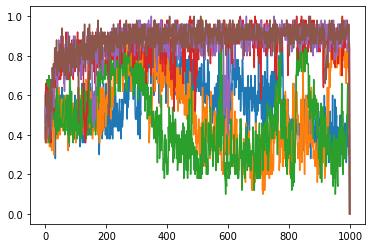

In [56]:
#Plot metrics for each condition
plt.plot(mean_reward_obs.T)
plt.title('Observational learning')

Text(0.5, 1.0, 'Off-policy interventional learning')

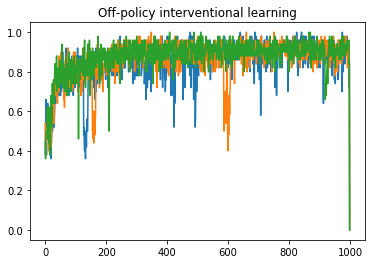

In [57]:
plt.plot(mean_reward_obsint.T)
plt.title('Off-policy interventional learning')